In [6]:
import numpy as np 
from tensorflow.keras.datasets import mnist


# load the data set 
(x_train, _), (x_test,_) = mnist.load_data()

# Normalize the pixel values 
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# Flatten the images 
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [8]:
# Build autoencorder model 
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense 

# Encoder 
input_layer = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_layer)

# Bottleneck 
bottleneck = Dense(32,activation='relu')(encoded)

# Decoder 
decoded = Dense(64,activation='relu')(bottleneck)
output_layer = Dense(784, activation = 'sigmoid')(decoded)

# Auto encoder model 
autoencoder = Model(input_layer, output_layer)

# compile the model 
autoencoder.compile(optimizer='adam', loss = 'binary_crossentropy')

# Summary the model 
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 784)                 │          50,960 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 105,392 (411.69 KB)

 Trainable params: 105,392 (411.69 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Train the auto encoder

autoencoder.fit(
    x_train, x_train,
    epochs=25,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test,x_test)
)

Epoch 1/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.3690 - val_loss: 0.1789
Epoch 2/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1702 - val_loss: 0.1471
Epoch 3/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1434 - val_loss: 0.1301
Epoch 4/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1291 - val_loss: 0.1223
Epoch 5/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1221 - val_loss: 0.1163
Epoch 6/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1170 - val_loss: 0.1126
Epoch 7/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1131 - val_loss: 0.1083
Epoch 8/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1091 - val_loss: 0.1057
Epoch 9/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.1068 - val_loss: 0.1041
Epoch 10/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.1051 - val_loss: 0.1030
Epoch 11/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1034 - val_loss: 0.1006
Epoch 12/25
235/235 ━━━━━━━━━━━━━━━━━━━━ 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<function matplotlib.pyplot.show(close=None, block=None)>

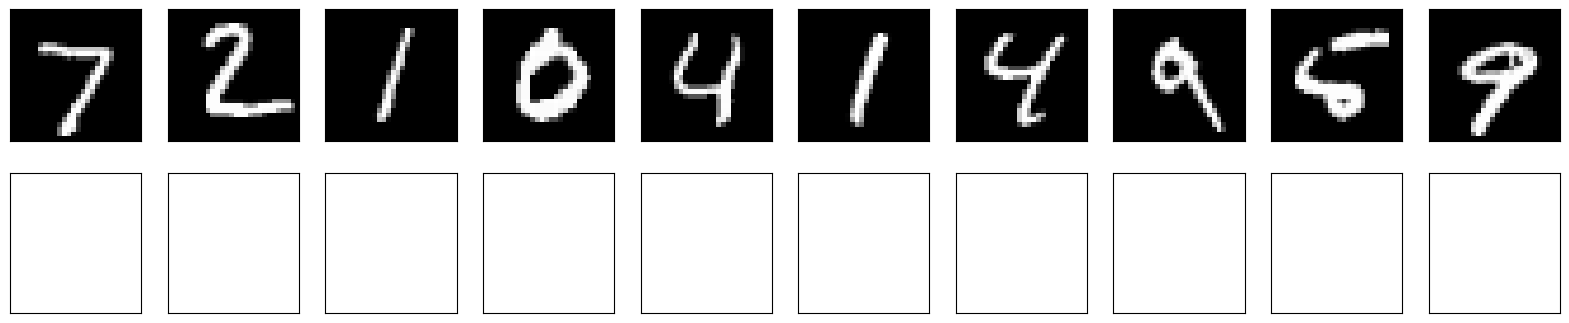

In [10]:
# Evaluate the encoder

import matplotlib.pyplot as plt 

# predict the test data 
reconstructured = autoencoder.predict(x_test)

# Visualize the results 
n = 10 # number of digits to display
plt.figure(figsize=(20,4))

for i in range(n):
    # Display the origin 
    ax = plt.subplot(2,n, i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the reconstruction 
    ax = plt.subplot(2,n, i+1+n)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show

In [11]:
# Fine tuning the auto encoder 

for layer in autoencoder.layers[-4:]:
    layer.trainable = True

# re-Compile the model 
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Re train the model 
autoencoder.fit(x_train,x_train,
               epochs = 10,
               batch_size=256,
               shuffle=True,
               validation_data =(x_test, x_test)
                )

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0937 - val_loss: 0.0905
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0916 - val_loss: 0.0904
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0912 - val_loss: 0.0904
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0911 - val_loss: 0.0898
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0909 - val_loss: 0.0896
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0907 - val_loss: 0.0893
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0903 - val_loss: 0.0891
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0899 - val_loss: 0.0889
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0895 - val_loss: 0.0889
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0896 - val_loss: 0.0890


Epoch 1/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.2128 - val_loss: 0.1410
Epoch 2/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.1391 - val_loss: 0.1312
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1311 - val_loss: 0.1269
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1271 - val_loss: 0.1247
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.1250 - val_loss: 0.1232
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1239 - val_loss: 0.1223
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.1228 - val_loss: 0.1219
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1220 - val_loss: 0.1213
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1214 - val_loss: 0.1210
Epoch 10/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.1213 - val_loss: 0.1205
Epoch 11/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.1209 - val_loss: 0.1207
Epoch 12/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 

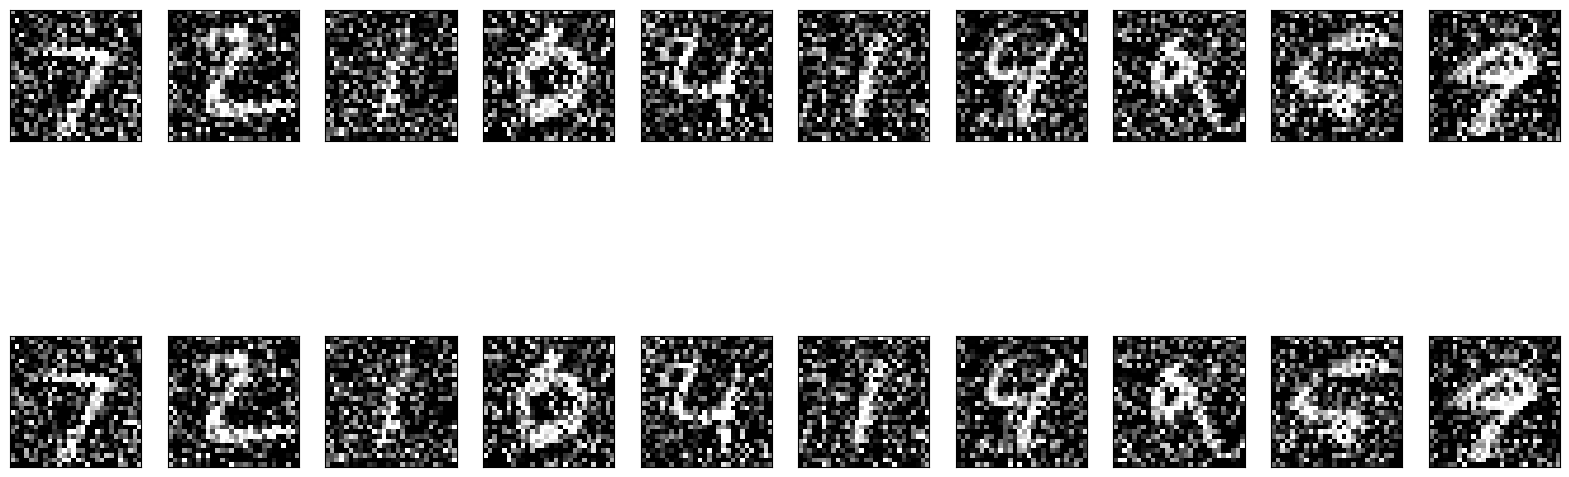

In [13]:
# Denoising image 

import numpy as np 

# Add noise into the data 
noise_factor = 0.5 
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

# train autoencoder with noisy data 
autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=512,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Denoise the test images 
reconstructured_noisy = autoencoder.predict(x_test_noisy)

# Visualize the results
n = 10 # num of display digits
plt.figure(figsize=(20,6))
for i in range(n):
    # Display noisy image 
    ax = plt.subplot(3,n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display original image
    ax = plt.subplot(3,n, i+1+2*n)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [ ]:
_